In [1]:
import numpy as np
import pandas as pd
import folium, html, json
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('../data/brazil_corona19_data.csv')
df['date'] = df['date'].astype('datetime64[ns]')


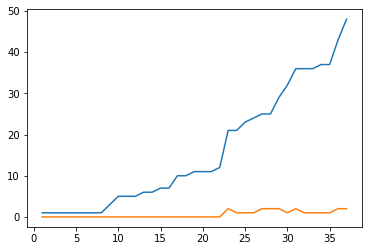

In [3]:
df = df[df['city']=='Ivinhema']
plt.plot(df.day,df.cases)
plt.plot(df.day,df.avg7_cases)
# plt.plot(df.day,df.deaths)

In [4]:
df.tail()

,date,state,city,place_type,cases,deaths,day,is_last,population,city_ibge_code,...,var_death_day,cases_thousand,deaths_thousand,case_day_thousand,death_day_thousand,avg7_cases,avg7_deaths,avg7_perc_death,avg7_case_day_thousand,avg7_death_day_thousand
108861,2020-06-26,MS,Ivinhema,city,36,0,33,False,23187,5004700,...,0.0,1.553,0.0,0.000,0.0,1,0,0.0,0.074,0.0
108862,2020-06-28,MS,Ivinhema,city,37,0,34,False,23187,5004700,...,0.0,1.596,0.0,0.043,0.0,1,0,0.0,0.074,0.0
108863,2020-06-29,MS,Ivinhema,city,37,0,35,False,23187,5004700,...,0.0,1.596,0.0,0.000,0.0,1,0,0.0,0.074,0.0
108864,2020-06-30,MS,Ivinhema,city,43,0,36,False,23187,5004700,...,0.0,1.854,0.0,0.259,0.0,2,0,0.0,0.086,0.0
108865,2020-07-01,MS,Ivinhema,city,48,0,37,True,23187,5004700,...,0.0,2.070,0.0,0.216,0.0,2,0,0.0,0.099,0.0


In [5]:
df = pd.read_csv('../data/world_corona19_data.csv', sep=',')
df['date'] = df['date'].astype('datetime64[ns]')


In [6]:
df = df[df['country']=='Brazil']
df.tail()

,country,date,cases,deaths,recoveries,day,case_day,death_day,recovery_day,%var_case_day,...,recovery_day_million,avg7_cases,avg7_deaths,avg7_recoveries,avg7_case_day_million,avg7_death_day_million,avg7_recovery_day_million,perc_death,perc_recovery,active_cases
2698,Brazil,2020-06-28,1344143,57622,746018,124,30476.0,552,18303,-21.24,...,86.7,37257.0,1004.0,22557.0,176.529,4.757,106.886,4.29,55.50,540503
2699,Brazil,2020-06-29,1368195,58314,757811,125,24052.0,692,11793,-21.08,...,55.9,37389.0,1006.0,22296.0,177.157,4.771,105.657,4.26,55.39,552070
2700,Brazil,2020-06-30,1402041,59594,788318,126,33846.0,1280,30507,40.72,...,144.5,36590.0,992.0,22907.0,173.371,4.714,108.543,4.25,56.23,554129
2701,Brazil,2020-07-01,1448753,60632,817642,127,46712.0,1038,29324,38.01,...,138.9,37160.0,971.0,22453.0,176.071,4.614,106.386,4.19,56.44,570479
2702,Brazil,2020-07-02,1496858,61884,957692,128,48105.0,1252,140050,2.98,...,663.6,38392.0,987.0,39738.0,181.900,4.686,188.286,4.13,63.98,477282


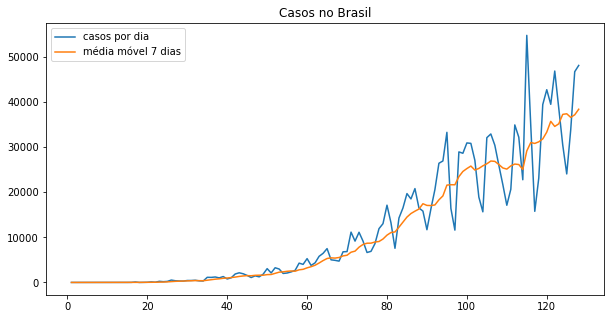

In [7]:
plt.figure(figsize=(10,5))
plt.title('Casos no Brasil')
plt.plot(df.day,df.case_day, label='casos por dia')
plt.plot(df.day,df.avg7_cases, label='média móvel 7 dias')
plt.legend()

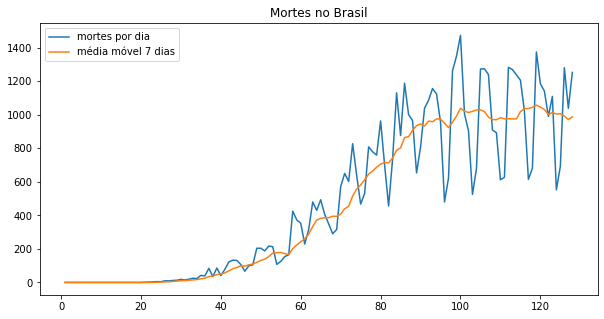

In [8]:
plt.figure(figsize=(10,5))
plt.title('Mortes no Brasil')
plt.plot(df.day,df.death_day, label='mortes por dia')
plt.plot(df.day,df.avg7_deaths, label='média móvel 7 dias')
plt.legend()